<a href="https://colab.research.google.com/github/ananyasrivastav/Covid19/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files
file=files.upload()

Saving AgeGroupDetails.csv to AgeGroupDetails.csv


In [0]:
data=pd.read_csv("AgeGroupDetails.csv",header=0)
data.head(9)

,Sno,AgeGroup,TotalCases,Percentage
0,1,0-9,22,3.18%
1,2,10-19,27,3.90%
2,3,20-29,172,24.86%
3,4,30-39,146,21.10%
4,5,40-49,112,16.18%
5,6,50-59,77,11.13%
6,7,60-69,89,12.86%
7,8,70-79,28,4.05%
8,9,>=80,10,1.45%


In [0]:
data.describe()

,Sno,TotalCases
count,10.00000,10.000000
mean,5.50000,69.200000
std,3.02765,59.241127
min,1.00000,9.000000
25%,3.25000,23.250000
50%,5.50000,52.500000
75%,7.75000,106.250000
max,10.00000,172.000000


[]

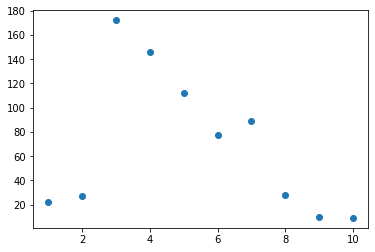

In [0]:
plt.scatter(data['Sno'],data['TotalCases'])
plt.xlabel=("Age of people")
plt.ylabel=("Total Confirmed Cases")
plt.title=("Corona with age Presdiction")
plt.plot()


In [0]:

data_n=data.values
m=data_n[:,0].size
x=data_n[:,0].reshape(m,1)
y=data_n[:,2].reshape(m,1)
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,random_state=0)

In [0]:
xTrain

array([[5],
       [10],
       [2],
       [7],
       [8],
       [4],
       [1],
       [6]], dtype=object)

In [0]:
yTrain

array([[112],
       [9],
       [27],
       [89],
       [28],
       [146],
       [22],
       [77]], dtype=object)

In [0]:
lr=LinearRegression()
lr.fit(xTrain,yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
ypred=lr.predict(xTest)

In [0]:
ypred

array([[68.29549902],
       [56.81213307]])

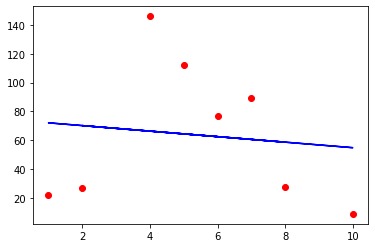

In [0]:
import matplotlib.pyplot as plot
plot.scatter(xTrain,yTrain,color='red')
plot.plot(xTrain,lr.predict(xTrain),color='blue')
plot.title=('Age Vs Corona Confirmed')
plot.xlabel=('Age')
plot.ylabel=('Confirmed Cases')
plot.show()



In [0]:
def computeCost(X,y,theta):
  m=len(y)
  pred=X.dot(theta)
  square_err=(pred-y)**2
  a=1/(2*m)
  return a*np.sum(square_err)

In [0]:
data_n=data.values
m=data_n[:,0].size
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,2].reshape(m,1)
theta=np.zeros((2,1))
computeCost(X,y,theta)

3973.6000000000004

In [0]:
def gradientDescent(X,y,theta,alpha,num_iters):
  m=len(y)
  J_history=[]
  for i in range(num_iters):
    pred=X.dot(theta)
    error=np.dot(X.transpose(),(pred-y))
    descent=alpha * 1/m *error
    theta=theta-descent
    J_history.append(computeCost(X,y,theta))
  return theta,J_history

In [0]:
theta,J_history=gradientDescent(X,y,theta,0.01,6000)
print("h(x) = "+str(round(theta[0,0],2))+ " + " + str(round(theta[1,0],2))+"x1")

h(x) = 107.93 + -7.04x1


In [0]:
computeCost(X,y,theta)

1374.6975757711327

In [0]:
from mpl_toolkits.mplot3d import Axes3D

In [0]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
  for j in range(len(theta1_vals)):
    t=np.array([theta0_vals[i],theta1_vals[j]])
    J_vals[i,j]=computeCost(X,y,t)


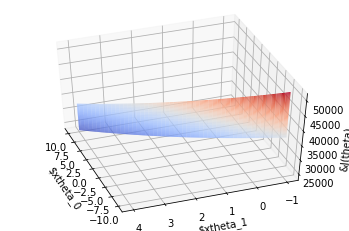

In [0]:
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
ax.set_xlabel("$xtheta_0")
ax.set_ylabel("$xtheta_1")
ax.set_zlabel("&J(theta)")
ax.view_init(45,160)

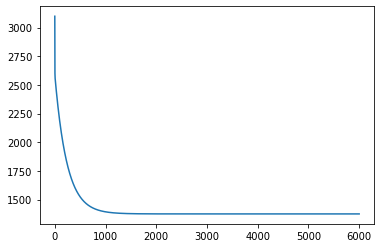

In [0]:
plt.plot(J_history)
plt.xlabel=('Iterations')
plt.ylabel=('$J(theta)')
plt.title=('Cost Function using Gradient Descent')

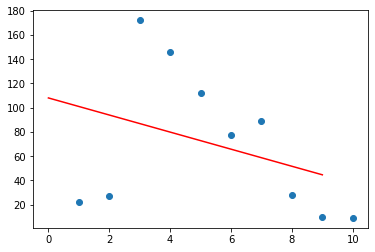

In [0]:
plt.scatter(data['Sno'],data['TotalCases'])
x_values=[x for x in range(10)]
y_values=[y*theta[1]+theta[0] for y in x_values]
plt.plot(x_values,y_values,color='r')
plt.xlabel=("Population in 10000s")
plt.ylabel=("Profit($10000)")
plt.title=("Profit Prediction")


In [0]:
def predict(x,theta):
  predictions=np.dot(theta.transpose(),x)
  return predictions[0]

In [0]:
predict1=predict(np.array([1,5.0]),theta)


In [0]:
predict1

72.721111888064